# Analysis of the movement and activity of free-ranging cattle

# 1. Business Understanding
Farmers want to analyse how their cattle moves and behaives on the field.
(see readme for more information)

# 2. Data and Data Understanding
## 2.1. Import of Relevant Modules  

In [34]:
import numpy as np # standard for data processing
import pandas as pd # standard for data processing

import plotly.graph_objects as go # creates plots
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Read data

Source of the data:
* Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.

Downloaded from Kaggle:
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

There are two separate data sets from the test group and the training group. These are first summarized again for further analysis. The data is identified whether it comes from the train or test data set so that it can be split up again later.

In [35]:
df_train = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Analysis_of_the_movement_and_activity_of_free-ranging_cattle_test.csv', delimiter=',')

In [36]:
df_test = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Analysis_of_the_movement_and_activity_of_free-ranging_cattle_test.csv', delimiter=',')

In [37]:
df_train['type']='train'

In [38]:
df_test['type']='test'

In [39]:
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [40]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,type
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,train


# 3. Data Exploration and Preparation

In [41]:
print('Total number of observations: ' + str(df.shape[0]))

Total number of observations: 10299


### Check for missing values

In [42]:
df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
type                    0
Length: 564, dtype: int64

In [43]:
df.isna().sum().sum()

0

--> **no missing values** in the Data Frame

### Check for duplicates

In [44]:
df[df.duplicated()]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,type


--> **no duplicated rows** in the data

### Target variable

We have a classification problem and the target column is the "Activity" column

In [45]:
#Possible classes/labels
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<AxesSubplot:>

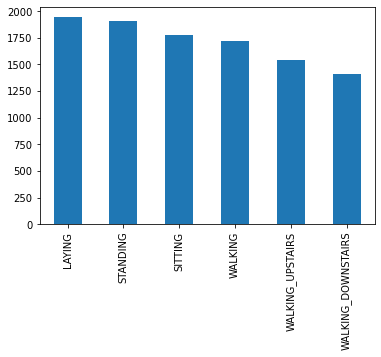

In [46]:
df['Activity'].value_counts().plot.bar()

* In the smart farming context of this assignment a cattle normally would not walk on a stairwell. Therefore the rows with the labels 'WALKING_DOWNSTAIRS' and 'WALKING_UPSTAIRS' will be removed:

In [47]:
indexNames = df[(df['Activity'] == 'WALKING_DOWNSTAIRS') | (df['Activity'] == 'WALKING_UPSTAIRS')].index
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

<AxesSubplot:>

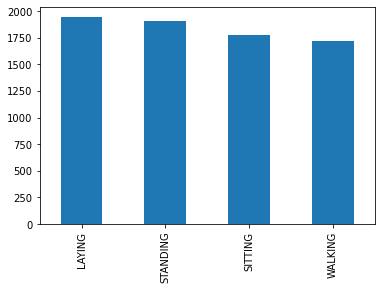

In [48]:
df['Activity'].value_counts().plot.bar()

- For each activity approximately the same number of observations. We could over-sample all minority classes before modelling to have a perfect balanced dataset

### How many observations from each subject exists?

<AxesSubplot:>

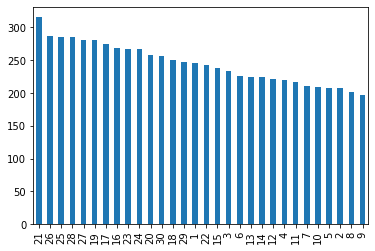

In [49]:
df['subject'].value_counts().plot.bar()

The figure above is interesting. Normally all subjects have done the same experiment sequence. Therefore we would expact that the number of observations from each subject must be nearly the same. But there is a range from 200 to 300 observations over all subjects. One reason could be that the change from one activity to the next in the sequence was not sharp or clear enough and the observers had delete the unclear observations in this unstabel phases afterwards.  

### Total number of observations

In [50]:
print('Number of observations: ' + str(df.shape[0]))

Number of observations: 7349


### PCA for Visualisation
- **Pricipal component analysis** is a simple way to visualize high dimensional data in a low dimensional space. (Caution: we pay for it with a loss of information-->but for visualisation purpose it is OK)

In [51]:
data_visualisation = df.drop('subject', axis =1).drop('Activity', axis=1).drop('type', axis =1)

In [52]:
s = StandardScaler()
data_visualisation = s.fit_transform(data_visualisation)

In [53]:
#We want 3 
p = PCA(n_components = 3)
data_visualisation_transformed = p.fit_transform(data_visualisation)
#data_visualisation_transformed = p.transform(data_visualisation)

In [54]:
print('Features before PCA: ' + str(data_visualisation.shape[1]))

Features before PCA: 561


In [55]:
print('Features after PCA: ' + str(data_visualisation_transformed.shape[1]))

Features after PCA: 3


In [56]:
p.explained_variance_ratio_.sum()

0.619964301867613

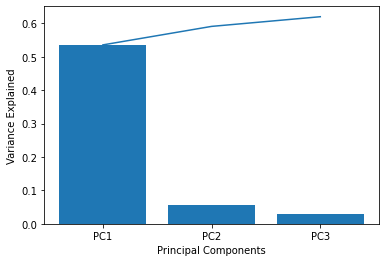

In [57]:
x = []
for i in range(0, len(p.explained_variance_ratio_)):
    x.append('PC' + str(i + 1))
y = np.array(p.explained_variance_ratio_)
z = np.cumsum(p.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.bar(x, y)
plt.plot(x, z)

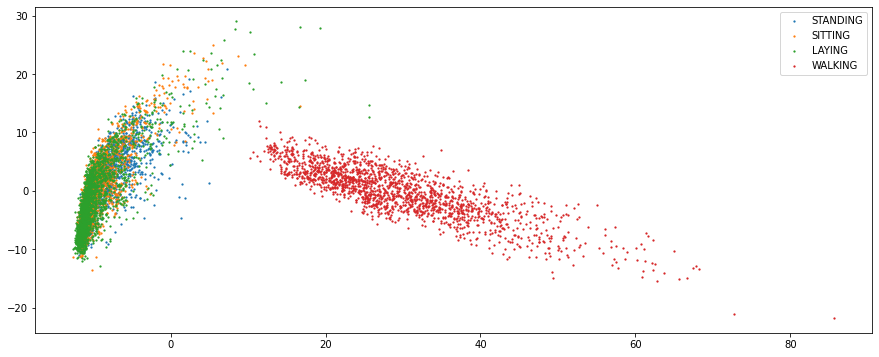

In [58]:
#labels 'STANDING', 'SITTING', 'LAYING', 'WALKING'

#fig, ax = plt.subplots()
plt.figure(figsize=(15,6))
for activity in df['Activity'].unique():
    filtered_val = data_visualisation_transformed[df['Activity']==activity,:]
    plt.scatter(filtered_val[:,0], filtered_val[:,1], label=activity, s=1.5)

plt.legend()
plt.show()

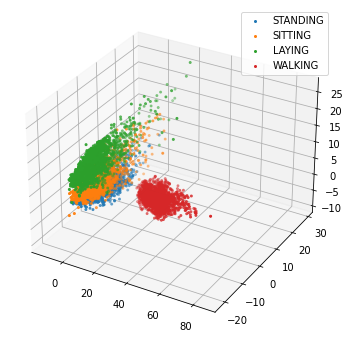

In [59]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(111, projection='3d')

for activity in df['Activity'].unique():
    filtered_val = data_visualisation_transformed[df['Activity'] == activity, :]
    ax.scatter(
        filtered_val[:, 0], 
        filtered_val[:, 1], 
        filtered_val[:, 2], 
        label = activity, 
        s = 4
    )

plt.legend()
plt.show()

In [60]:
### Interactive 3D-plot with plotly

# representations require a lot of computing power**

si = np.ones(7349)-0.7
fig = px.scatter_3d(data_visualisation_transformed, 
                    x=data_visualisation_transformed[:, 0], 
                    y=data_visualisation_transformed[:, 1], 
                    z=data_visualisation_transformed[:, 2],
                    color=df['Activity'],
                    #size=si
                    )
fig.update_traces(marker=dict(size=2.5,line=dict(width=0.05,color='azure')),selector=dict(mode='markers'))
fig.show()

### Results Visualisation with PCA

* After the PCA / transformation to 3 pricipal components we can visual separate the 3 classes in an adequate way. 
* But the 3 principal components only describe 62% of the variance of the original data. That means we have a relativly big infomation loss. 
* A Second problem is that it´s hard to interpret models based on the result of a PCA

-->we use the PCA only for visualization and don´t use it for modelling

### Feature overview

From the original Paper about the data/Source of the data we can get the information that there are the following 17 main time and frequency domain signal features: 

|Name|Time|Freq.|
| --- | --- | --- |
Body Acc |1| 1
Gravity Acc |1| 0
Body Acc Jerk |1 |1
Body Angular Speed |1 |1
Body Angular Acc |1 |0
Body Acc Magnitude |1 |1
Gravity Acc Mag |1 |0
Body Acc Jerk Mag |1 |1
Body Angular Speed Mag |1 |1
Body Angular Acc Mag |1 |1

In [61]:
data_temp = df.drop('subject', axis =1).drop('Activity', axis=1).drop('type', axis =1)

In [62]:
print('Features: ' + str(data_temp.shape[1]))

Features: 561


In [63]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


### check for Multicollinearity

In [65]:
variables = data_temp
vif = pd.DataFrame()

In [66]:
# This takes many minutes to compute 
# This is very cpu intensive

tempList = list()
total = variables.shape[1]
for i in range(total):
    print(i, ' out of ', total-1)
    x = variance_inflation_factor(variables.values, i)
    tempList.append(x)

0  out of  560
1  out of  560
2  out of  560
3  out of  560
4  out of  560
5  out of  560
6  out of  560
7  out of  560
8  out of  560
9  out of  560
10  out of  560
11  out of  560
12  out of  560
13  out of  560
14  out of  560
15  out of  560
16  out of  560
17  out of  560
18  out of  560
19  out of  560
20  out of  560
21  out of  560
22  out of  560
23  out of  560
24  out of  560
25  out of  560
26  out of  560
27  out of  560
28  out of  560
29  out of  560
30  out of  560
31  out of  560
32  out of  560
33  out of  560
34  out of  560
35  out of  560
36  out of  560
37  out of  560
38  out of  560
39  out of  560
40  out of  560
41  out of  560
42  out of  560
43  out of  560
44  out of  560
45  out of  560
46  out of  560
47  out of  560
48  out of  560
49  out of  560
50  out of  560
51  out of  560
52  out of  560
53  out of  560
54  out of  560
55  out of  560
56  out of  560
57  out of  560
58  out of  560
59  out of  560
60  out of  560
61  out of  560
62  out of  560
63

C:\Users\eebal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



202  out of  560
203  out of  560
204  out of  560
205  out of  560
206  out of  560
207  out of  560
208  out of  560
209  out of  560
210  out of  560
211  out of  560
212  out of  560
213  out of  560
214  out of  560
215  out of  560
216  out of  560
217  out of  560
218  out of  560
219  out of  560
220  out of  560
221  out of  560
222  out of  560
223  out of  560
224  out of  560
225  out of  560
226  out of  560
227  out of  560
228  out of  560
229  out of  560
230  out of  560
231  out of  560
232  out of  560
233  out of  560
234  out of  560
235  out of  560
236  out of  560
237  out of  560
238  out of  560
239  out of  560
240  out of  560
241  out of  560
242  out of  560
243  out of  560
244  out of  560
245  out of  560
246  out of  560
247  out of  560
248  out of  560
249  out of  560
250  out of  560
251  out of  560
252  out of  560
253  out of  560
254  out of  560
255  out of  560
256  out of  560
257  out of  560
258  out of  560
259  out of  560
260  out of  5

In [67]:
# add name of features to vif dataframe
vif["Features"] = variables.columns

# add the computed VIF Values to the vif dataframe
vif["VIF"] = tempList

In [68]:
vif[vif['VIF']>10]

,VIF,Features
0,1.673655e+02,tBodyAcc-mean()-X
2,2.458447e+01,tBodyAcc-mean()-Z
3,2.000913e+06,tBodyAcc-std()-X
4,5.503812e+05,tBodyAcc-std()-Y
5,5.281580e+05,tBodyAcc-std()-Z
...,...,...
552,7.882126e+01,fBodyBodyGyroJerkMag-skewness()
553,1.882061e+02,fBodyBodyGyroJerkMag-kurtosis()
558,1.310881e+03,"angle(X,gravityMean)"
559,3.877562e+02,"angle(Y,gravityMean)"


In [69]:
#Drop all features with a VIF > 10, as they are correlating to much with other features
features_to_drop = vif[vif['VIF']>10].Features

In [70]:
data_with_important_features = data_temp.drop(features_to_drop, axis = 1)

In [71]:
data_with_important_features.head()

,tBodyAcc-mean()-Y,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,...,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInds-Y,fBodyAccJerk-maxInds-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,-0.020294,0.376314,0.435129,0.660790,0.570222,0.439027,0.986913,0.077996,0.005001,-0.067831,...,1.00,-0.24,-1.00,-0.257549,0.097947,0.547151,-0.112754,0.030400,-0.464761,-0.018446
1,-0.016411,-0.013429,-0.072692,0.579382,-0.831284,-0.865711,0.974386,0.074007,0.005771,0.029377,...,-0.32,-0.12,-0.32,-0.048167,-0.401608,-0.068178,0.053477,-0.007435,-0.732626,0.703511
2,-0.019467,-0.124698,-0.181105,0.608900,-0.181090,0.337936,0.643417,0.073636,0.003104,-0.009046,...,-0.16,-0.48,-0.28,-0.216685,-0.017264,-0.110720,-0.118559,0.177899,0.100699,0.808529
3,-0.026201,-0.305693,-0.362654,0.507459,-0.991309,-0.968821,0.984256,0.077321,0.020058,-0.009865,...,-0.12,-0.56,-0.28,0.216862,-0.135245,-0.049728,-0.036788,-0.012892,0.640011,-0.485366
4,-0.016570,-0.155804,-0.189763,0.599213,-0.408330,-0.184840,0.964797,0.073444,0.019122,0.016780,...,-0.32,-0.08,0.04,-0.153343,-0.088403,-0.162230,0.123320,0.122542,0.693578,-0.615971


In [72]:
data_with_important_features.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-Y,7349.0,-0.016299,0.038629,-1.000000,-0.021403,-0.017029,-0.012643,1.000000
"tBodyAcc-correlation()-X,Y",7349.0,-0.024801,0.360763,-1.000000,-0.242409,-0.058502,0.172579,1.000000
"tBodyAcc-correlation()-X,Z",7349.0,-0.185987,0.338450,-1.000000,-0.395440,-0.171765,0.020009,1.000000
"tBodyAcc-correlation()-Y,Z",7349.0,0.096760,0.415218,-1.000000,-0.187455,0.138724,0.405517,1.000000
"tGravityAcc-correlation()-X,Y",7349.0,0.103601,0.735996,-1.000000,-0.665946,0.231863,0.851334,1.000000
"tGravityAcc-correlation()-X,Z",7349.0,-0.166366,0.726580,-1.000000,-0.879864,-0.367198,0.567089,1.000000
"tGravityAcc-correlation()-Y,Z",7349.0,0.075266,0.735481,-1.000000,-0.688232,0.185269,0.823623,1.000000
tBodyAccJerk-mean()-X,7349.0,0.077434,0.108154,-0.581496,0.071259,0.075963,0.081112,0.855403
tBodyAccJerk-mean()-Y,7349.0,0.009156,0.124891,-0.948714,0.000186,0.010928,0.021387,0.835172
tBodyAccJerk-mean()-Z,7349.0,-0.003619,0.113880,-0.807273,-0.015246,-0.001097,0.012727,0.735045


Text(0.5, 0, 'Feautures')

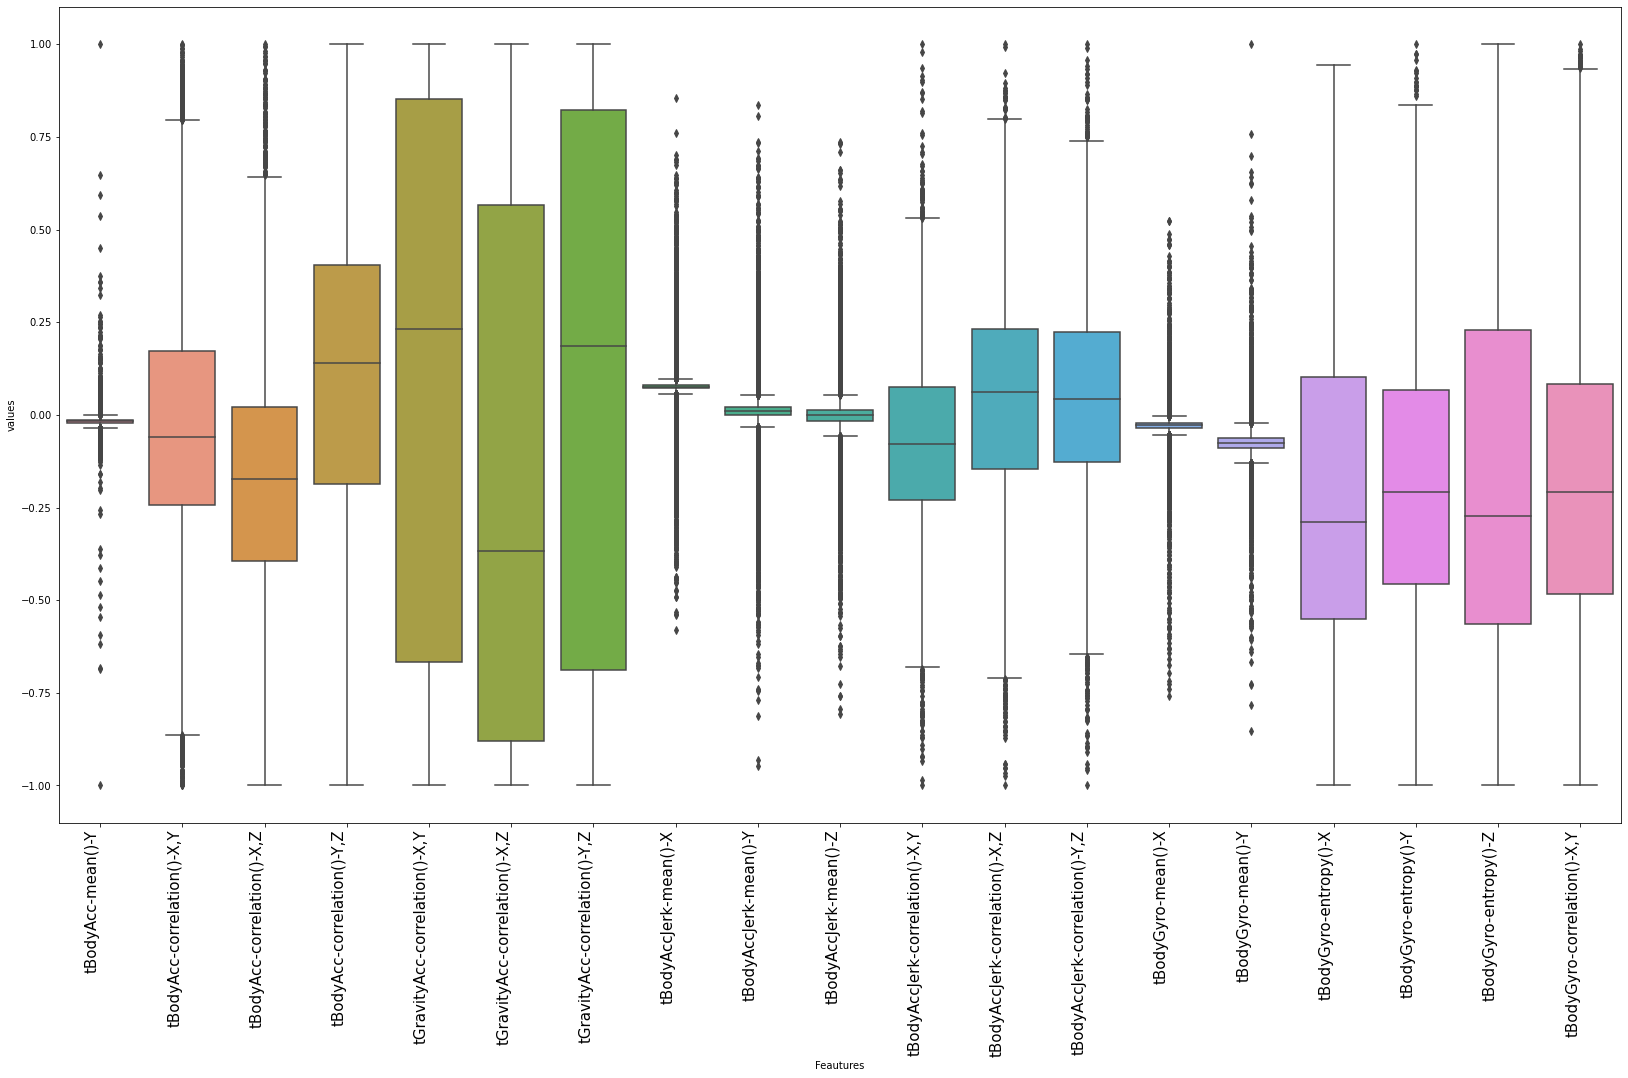

In [73]:
plt.figure(figsize=(28,15))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_with_important_features.iloc[:,:19]))
boxplot.xaxis.set_ticklabels(boxplot.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=15)
plt.ylabel('values')
plt.xlabel('Feautures')

Text(0.5, 0, 'Feautures')

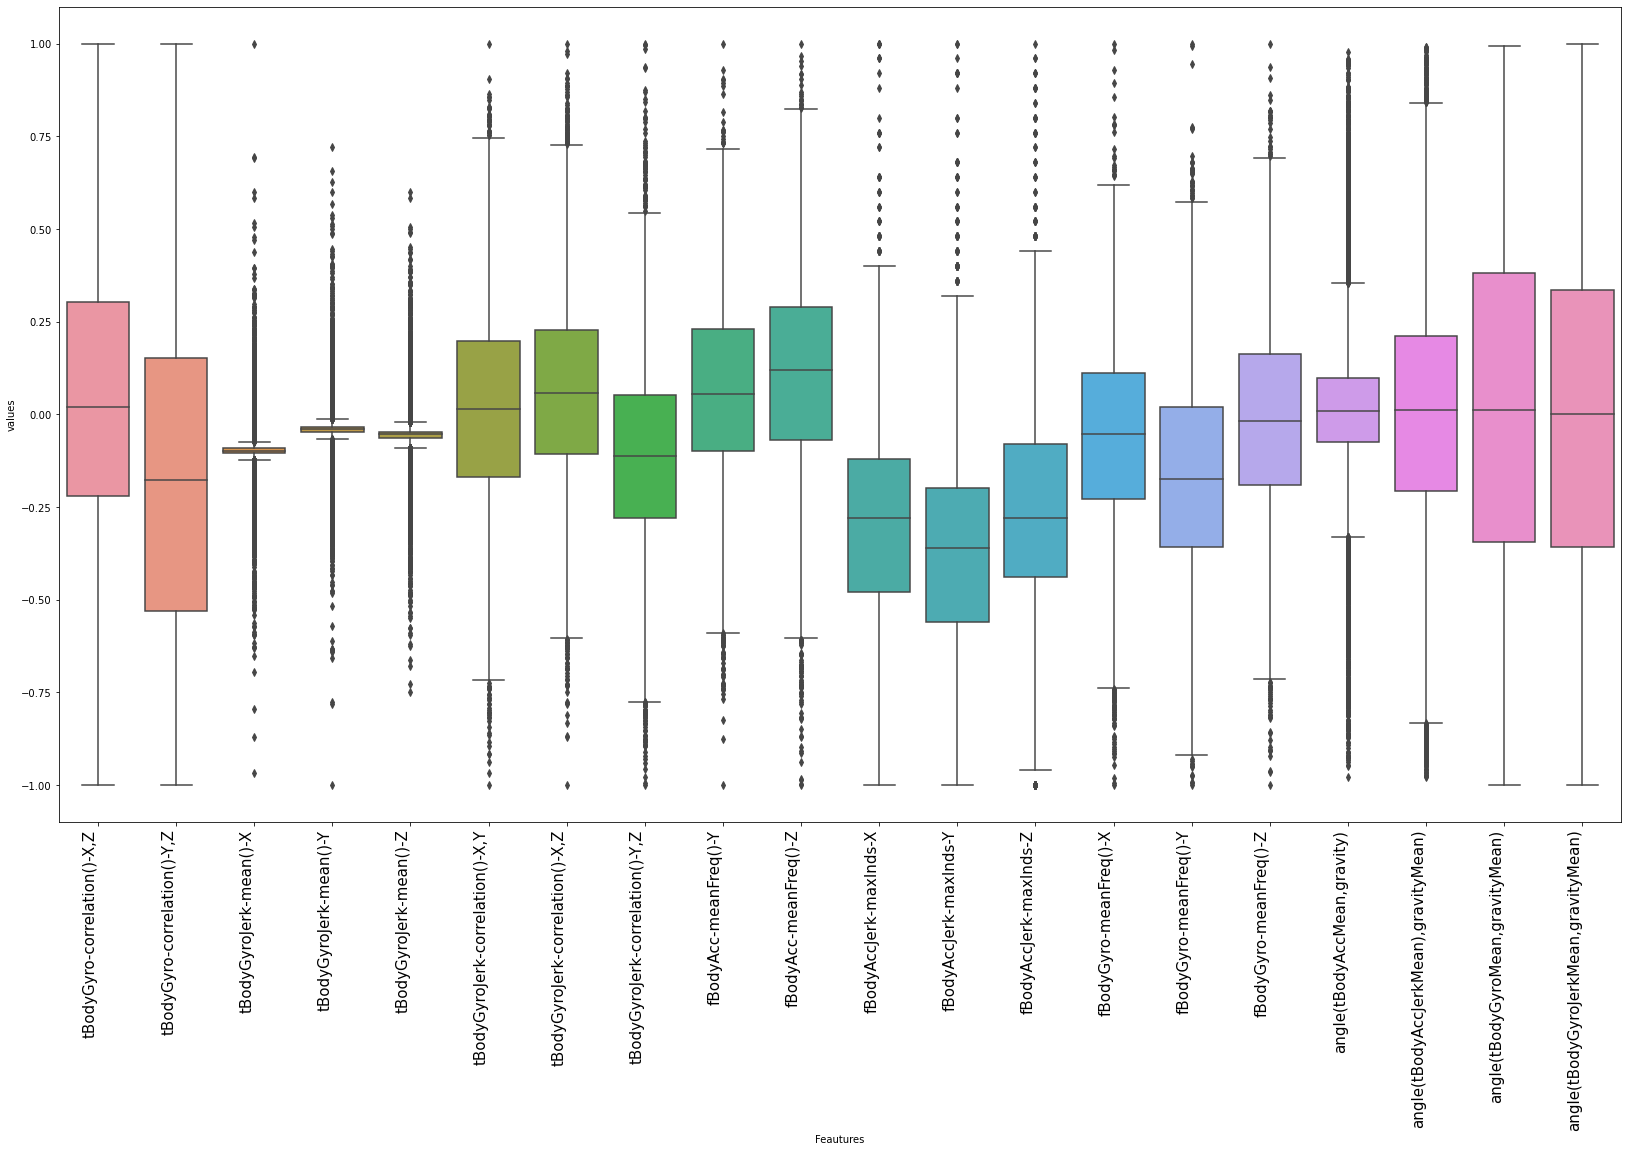

In [74]:
plt.figure(figsize=(28,15))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(data_with_important_features.iloc[:,19:]))
boxplot.xaxis.set_ticklabels(boxplot.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=15)
plt.ylabel('values')
plt.xlabel('Feautures')

### Summary of the Data Understanding
* 1 column with the subject id 'subject'-->only for filtering, must be removed
* 1 target column 'Activity'-->4 classes(WALKING, SITTING, LAYING, STANDING) a little bit unbalanced
* we have a multiclass classification problem-->**supervised machine learning**
* 1 "support column" source-->is the observation from the train or test group-->train test split along this value
* Addionally there are many features callculated out of the 17 time and frequency domain signal features. For example mean, min, max, std, signal magnitude area etc. 
* These were calculated for each of the three axes x,y and z if possible
* In sum that means 561 features
-->Analyzing each Feature in detail is very hard because of the high number of features. Eventually we have multilineraity in the data

* After Multicollineraty check, only 39 features left. We can see some outliers in some features in the boxplots but it is hard to analyze and interpret these outliers because it seams that the data is already partially standardized and we have no measurment units. So at the moment we accept these outliers


### Train Test Split

In [75]:
data = df.copy()

In [76]:
data_train = data[data['type']=='train']
data_test = data[data['type']=='test']

In [78]:
X_train = data_train.drop('subject', axis =1).drop('Activity', axis=1).drop('type', axis =1)
X_train = X_train.drop(features_to_drop, axis =1)
y_train = data_train['Activity']

X_test = data_test.drop('subject', axis =1).drop('Activity', axis=1).drop('type', axis =1)
X_test = X_test.drop(features_to_drop, axis =1)
y_test = data_test['Activity']

In [79]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X_train: (5293, 39)
y_train: (5293,)
X_test: (2056, 39)
y_test: (2056,)


### Data Oversampling

In [80]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

<AxesSubplot:>

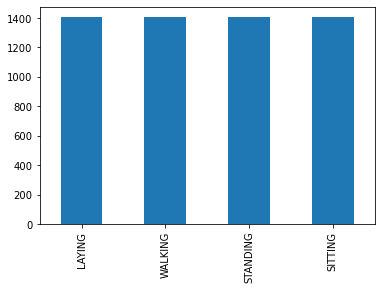

In [81]:
y_train_resampled.value_counts().plot.bar()

# Modeling 

To build some different models it is good practice to use Pipelines and GridSearchCV. These two tools are an easy way to make hyperparamter tuning & k-fold Cross-Validation on different models. In this case the pipes exists of a StandardScaler and an One vs Rest classifier

__Build & Evaluate some different Models__

## KNN
K-Nearest Neighbors

In [82]:
# Pipeline for KNN
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", OneVsRestClassifier(KNeighborsClassifier()))
])

In [83]:
pipeline1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__estimator__algorithm', 'knn__estimator__leaf_size', 'knn__estimator__metric', 'knn__estimator__metric_params', 'knn__estimator__n_jobs', 'knn__estimator__n_neighbors', 'knn__estimator__p', 'knn__estimator__weights', 'knn__estimator', 'knn__n_jobs'])

In [84]:
#GridSearchCV-Object
clf = GridSearchCV(pipeline1, verbose=10, param_grid = {
    "knn__estimator__n_neighbors": [8, 10, 20, 30]
})
clf.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] knn__estimator__n_neighbors=8 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... knn__estimator__n_neighbors=8, score=0.769, total=   3.5s
[CV] knn__estimator__n_neighbors=8 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ....... knn__estimator__n_neighbors=8, score=0.754, total=   3.3s
[CV] knn__estimator__n_neighbors=8 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] ....... knn__estimator__n_neighbors=8, score=0.801, total=   3.3s
[CV] knn__estimator__n_neighbors=8 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s remaining:    0.0s


[CV] ....... knn__estimator__n_neighbors=8, score=0.832, total=   3.5s
[CV] knn__estimator__n_neighbors=8 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.4s remaining:    0.0s


[CV] ....... knn__estimator__n_neighbors=8, score=0.818, total=   3.3s
[CV] knn__estimator__n_neighbors=10 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.7s remaining:    0.0s


[CV] ...... knn__estimator__n_neighbors=10, score=0.769, total=   3.4s
[CV] knn__estimator__n_neighbors=10 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.1s remaining:    0.0s


[CV] ...... knn__estimator__n_neighbors=10, score=0.749, total=   3.5s
[CV] knn__estimator__n_neighbors=10 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.6s remaining:    0.0s


[CV] ...... knn__estimator__n_neighbors=10, score=0.815, total=   3.4s
[CV] knn__estimator__n_neighbors=10 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.1s remaining:    0.0s


[CV] ...... knn__estimator__n_neighbors=10, score=0.828, total=   3.5s
[CV] knn__estimator__n_neighbors=10 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.6s remaining:    0.0s


[CV] ...... knn__estimator__n_neighbors=10, score=0.824, total=   3.5s
[CV] knn__estimator__n_neighbors=20 ..................................
[CV] ...... knn__estimator__n_neighbors=20, score=0.782, total=   3.5s
[CV] knn__estimator__n_neighbors=20 ..................................
[CV] ...... knn__estimator__n_neighbors=20, score=0.734, total=   3.5s
[CV] knn__estimator__n_neighbors=20 ..................................
[CV] ...... knn__estimator__n_neighbors=20, score=0.828, total=   3.5s
[CV] knn__estimator__n_neighbors=20 ..................................
[CV] ...... knn__estimator__n_neighbors=20, score=0.820, total=   3.3s
[CV] knn__estimator__n_neighbors=20 ..................................
[CV] ...... knn__estimator__n_neighbors=20, score=0.832, total=   3.4s
[CV] knn__estimator__n_neighbors=30 ..................................
[CV] ...... knn__estimator__n_neighbors=30, score=0.768, total=   3.6s
[CV] knn__estimator__n_neighbors=30 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        OneVsRestClassifier(estimator=KNeighborsClassifier()))]),
             param_grid={'knn__estimator__n_neighbors': [8, 10, 20, 30]},
             verbose=10)

In [85]:
print('Best parameters ' + str(clf.best_params_))
print('Best model score: ' + str(clf.best_score_))

Best parameters {'knn__estimator__n_neighbors': 20}
Best model score: 0.7988723899743437


In [86]:
results_KNN = pd.DataFrame(clf.cv_results_)
results_KNN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__estimator__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.291415,0.020557,3.064704,0.088606,8,{'knn__estimator__n_neighbors': 8},0.769094,0.753996,0.801066,0.832000,0.817778,0.794787,0.029247,3
1,0.305789,0.014108,3.177124,0.047759,10,{'knn__estimator__n_neighbors': 10},0.769094,0.748668,0.815275,0.827556,0.824000,0.796919,0.031973,2
2,0.291104,0.008228,3.165741,0.071301,20,{'knn__estimator__n_neighbors': 20},0.781528,0.733570,0.827709,0.819556,0.832000,0.798872,0.037207,1
3,0.291344,0.011009,3.311857,0.029414,30,{'knn__estimator__n_neighbors': 30},0.768206,0.726465,0.819716,0.819556,0.825778,0.791944,0.038806,4


In [87]:
classification_report_test = classification_report(y_test, clf.best_estimator_.predict(X_test), output_dict=True)
classification_report_train = classification_report(y_train_resampled, clf.best_estimator_.predict(X_train_resampled), output_dict=True)

In [88]:
#helper function
def make_results(classification_report_train, classification_report_test, model_type):
    df_rep1 = pd.DataFrame(classification_report_train)
    df_rep1['source'] ='train'
    df_rep1 = df_rep1.set_index([df_rep1.index,'source'])
    df_rep2 = pd.DataFrame(classification_report_test)
    df_rep2['source'] ='test'
    df_rep2 = df_rep2.set_index([df_rep2.index,'source'])
    frames = [df_rep1, df_rep2]
    df_rep = pd.concat(frames)
    df_rep['model_type'] = model_type
    df_rep = df_rep.set_index([df_rep.index,'model_type'])
    return df_rep.transpose()

In [89]:
results_KNN = make_results(classification_report_train, classification_report_test, 'KNN')
results_KNN

,precision,recall,f1-score,support,precision,recall,f1-score,support
source,train,train,train,train,test,test,test,test
model_type,KNN,KNN,KNN,KNN,KNN,KNN,KNN,KNN
LAYING,0.912238,0.805259,0.855417,1407.000000,0.850000,0.633147,0.725720,537.000000
SITTING,0.810458,0.793177,0.801724,1407.000000,0.631295,0.714868,0.670487,491.000000
STANDING,0.808673,0.901208,0.852437,1407.000000,0.757679,0.834586,0.794275,532.000000
WALKING,0.976405,1.000000,0.988062,1407.000000,0.957198,0.991935,0.974257,496.000000
accuracy,0.874911,0.874911,0.874911,0.874911,0.791342,0.791342,0.791342,0.791342
macro avg,0.876944,0.874911,0.874410,5628.000000,0.799043,0.793634,0.791185,2056.000000
weighted avg,0.876944,0.874911,0.874410,5628.000000,0.799743,0.791342,0.790227,2056.000000


## Random Forest

In [90]:
# Pipeline
pipeline2 = Pipeline([
    ("scaler", StandardScaler()),
    ("ranfo", OneVsRestClassifier(RandomForestClassifier()))
])

In [91]:
param_grid = {'ranfo__estimator__max_depth': [5, 15, 30]}

In [92]:
#GridSearchCV-Object
clf2 = GridSearchCV(pipeline2, param_grid = param_grid, verbose=10)
clf2.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] ranfo__estimator__max_depth=5 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... ranfo__estimator__max_depth=5, score=0.793, total=   7.9s
[CV] ranfo__estimator__max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV] ....... ranfo__estimator__max_depth=5, score=0.752, total=   7.6s
[CV] ranfo__estimator__max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


[CV] ....... ranfo__estimator__max_depth=5, score=0.850, total=   7.7s
[CV] ranfo__estimator__max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.1s remaining:    0.0s


[CV] ....... ranfo__estimator__max_depth=5, score=0.843, total=   7.7s
[CV] ranfo__estimator__max_depth=5 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.7s remaining:    0.0s


[CV] ....... ranfo__estimator__max_depth=5, score=0.830, total=   8.0s
[CV] ranfo__estimator__max_depth=15 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.8s remaining:    0.0s


[CV] ...... ranfo__estimator__max_depth=15, score=0.827, total=  13.2s
[CV] ranfo__estimator__max_depth=15 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   52.0s remaining:    0.0s


[CV] ...... ranfo__estimator__max_depth=15, score=0.813, total=  13.3s
[CV] ranfo__estimator__max_depth=15 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV] ...... ranfo__estimator__max_depth=15, score=0.877, total=  13.3s
[CV] ranfo__estimator__max_depth=15 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV] ...... ranfo__estimator__max_depth=15, score=0.876, total=  13.4s
[CV] ranfo__estimator__max_depth=15 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV] ...... ranfo__estimator__max_depth=15, score=0.886, total=  13.6s
[CV] ranfo__estimator__max_depth=30 ..................................
[CV] ...... ranfo__estimator__max_depth=30, score=0.831, total=  13.3s
[CV] ranfo__estimator__max_depth=30 ..................................
[CV] ...... ranfo__estimator__max_depth=30, score=0.821, total=  13.6s
[CV] ranfo__estimator__max_depth=30 ..................................
[CV] ...... ranfo__estimator__max_depth=30, score=0.877, total=  13.8s
[CV] ranfo__estimator__max_depth=30 ..................................
[CV] ...... ranfo__estimator__max_depth=30, score=0.876, total=  13.8s
[CV] ranfo__estimator__max_depth=30 ..................................
[CV] ...... ranfo__estimator__max_depth=30, score=0.888, total=  14.3s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ranfo',
                                        OneVsRestClassifier(estimator=RandomForestClassifier()))]),
             param_grid={'ranfo__estimator__max_depth': [5, 15, 30]},
             verbose=10)

In [93]:
print('Best parameters ' + str(clf2.best_params_))
print('Best model score: ' + str(clf2.best_score_))

Best parameters {'ranfo__estimator__max_depth': 30}
Best model score: 0.8583949477008093


In [94]:
classification_report_test = classification_report(y_test, clf2.best_estimator_.predict(X_test), output_dict=True)
classification_report_train = classification_report(y_train_resampled, clf2.best_estimator_.predict(X_train_resampled), output_dict=True)

In [95]:
results_RandomForest = make_results(classification_report_train, classification_report_test, 'RandomForest')
results_RandomForest

,precision,recall,f1-score,support,precision,recall,f1-score,support
source,train,train,train,train,test,test,test,test
model_type,RandomForest,RandomForest,RandomForest,RandomForest,RandomForest,RandomForest,RandomForest,RandomForest
LAYING,1.0,1.0,1.0,1407.0,0.821705,0.789572,0.805318,537.00000
SITTING,1.0,1.0,1.0,1407.0,0.784519,0.763747,0.773994,491.00000
STANDING,1.0,1.0,1.0,1407.0,0.829710,0.860902,0.845018,532.00000
WALKING,1.0,1.0,1.0,1407.0,0.970588,0.997984,0.984095,496.00000
accuracy,1.0,1.0,1.0,1.0,0.852140,0.852140,0.852140,0.85214
macro avg,1.0,1.0,1.0,5628.0,0.851631,0.853051,0.852106,2056.00000
weighted avg,1.0,1.0,1.0,5628.0,0.850813,0.852140,0.851239,2056.00000


## Logistic Regression

In [96]:
# Pipeline
pipeline3 = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", OneVsRestClassifier(LogisticRegression(solver='newton-cg')))
])

In [97]:
#GridSearchCV-Object
clf3 = GridSearchCV(pipeline3, param_grid = {})
clf3.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        OneVsRestClassifier(estimator=LogisticRegression(solver='newton-cg')))]),
             param_grid={})

In [98]:
print('Best parameters ' + str(clf3.best_params_))
print('Best model score: ' + str(clf3.best_score_))

Best parameters {}
Best model score: 0.7738230905861456


In [99]:
classification_report_test = classification_report(y_test, clf3.best_estimator_.predict(X_test), output_dict=True)
classification_report_train = classification_report(y_train_resampled, clf3.best_estimator_.predict(X_train_resampled), output_dict=True)

In [100]:
results_LogisticRegression = make_results(classification_report_train, classification_report_test, 'LogReg')
results_LogisticRegression

,precision,recall,f1-score,support,precision,recall,f1-score,support
source,train,train,train,train,test,test,test,test
model_type,LogReg,LogReg,LogReg,LogReg,LogReg,LogReg,LogReg,LogReg
LAYING,0.761204,0.772566,0.766843,1407.000000,0.690702,0.677840,0.684211,537.000000
SITTING,0.747636,0.730633,0.739037,1407.000000,0.687970,0.745418,0.715543,491.000000
STANDING,0.791356,0.754797,0.772645,1407.000000,0.833684,0.744361,0.786495,532.000000
WALKING,0.924477,0.974414,0.948789,1407.000000,0.873563,0.919355,0.895874,496.000000
accuracy,0.808102,0.808102,0.808102,0.808102,0.769455,0.769455,0.769455,0.769455
macro avg,0.806169,0.808102,0.806828,5628.000000,0.771480,0.771743,0.770530,2056.000000
weighted avg,0.806169,0.808102,0.806828,5628.000000,0.771161,0.769455,0.769222,2056.000000


## Decision Tree

In [101]:
# Pipeline
pipeline4 = Pipeline([
    ("scaler", StandardScaler()),
    ("decisiontree", OneVsRestClassifier(DecisionTreeClassifier()))
])

In [102]:
#GridSearchCV-Object
clf4 = GridSearchCV(pipeline4, param_grid = {})
clf4.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('decisiontree',
                                        OneVsRestClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={})

In [103]:
print('Best parameters ' + str(clf4.best_params_))
print('Best model score: ' + str(clf4.best_score_))

Best parameters {}
Best model score: 0.6778698243536609


In [104]:
classification_report_test = classification_report(y_test, clf4.best_estimator_.predict(X_test), output_dict=True)
classification_report_train = classification_report(y_train_resampled, clf4.best_estimator_.predict(X_train_resampled), output_dict=True)

In [105]:
results_DecisionTree = make_results(classification_report_train, classification_report_test, 'DecisionTree')
results_DecisionTree

,precision,recall,f1-score,support,precision,recall,f1-score,support
source,train,train,train,train,test,test,test,test
model_type,DecisionTree,DecisionTree,DecisionTree,DecisionTree,DecisionTree,DecisionTree,DecisionTree,DecisionTree
LAYING,1.0,1.0,1.0,1407.0,0.803797,0.472998,0.595545,537.000000
SITTING,1.0,1.0,1.0,1407.0,0.642132,0.515275,0.571751,491.000000
STANDING,1.0,1.0,1.0,1407.0,0.695391,0.652256,0.673133,532.000000
WALKING,1.0,1.0,1.0,1407.0,0.578512,0.987903,0.729710,496.000000
accuracy,1.0,1.0,1.0,1.0,0.653696,0.653696,0.653696,0.653696
macro avg,1.0,1.0,1.0,5628.0,0.679958,0.657108,0.642535,2056.000000
weighted avg,1.0,1.0,1.0,5628.0,0.682790,0.653696,0.642306,2056.000000


## SVM
Support Vector Machine

In [106]:
# Pipeline
pipeline5 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", OneVsRestClassifier(svm.SVC()))
])

In [107]:
param_grid = {
    'svm__estimator__kernel': ['linear']}

In [108]:
#GridSearchCV-Object
clf5 = GridSearchCV(pipeline5, param_grid)
clf5.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        OneVsRestClassifier(estimator=SVC()))]),
             param_grid={'svm__estimator__kernel': ['linear']})

In [109]:
print('Best parameters ' + str(clf5.best_params_))
print('Best model score: ' + str(clf5.best_score_))

Best parameters {'svm__estimator__kernel': 'linear'}
Best model score: 0.776133570159858


In [110]:
results_SVM= pd.DataFrame(clf5.cv_results_)
results_SVM

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__estimator__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.828282,0.334218,0.329354,0.019774,linear,{'svm__estimator__kernel': 'linear'},0.740675,0.723801,0.784192,0.818667,0.813333,0.776134,0.038089,1


In [111]:
classification_report_test = classification_report(y_test, clf5.best_estimator_.predict(X_test), output_dict=True)
classification_report_train = classification_report(y_train_resampled, clf5.best_estimator_.predict(X_train_resampled), output_dict=True)

In [112]:
results_SVM = make_results(classification_report_train, classification_report_test, 'SVM')
results_SVM

,precision,recall,f1-score,support,precision,recall,f1-score,support
source,train,train,train,train,test,test,test,test
model_type,SVM,SVM,SVM,SVM,SVM,SVM,SVM,SVM
LAYING,0.773826,0.773276,0.773551,1407.000000,0.689394,0.677840,0.683568,537.000000
SITTING,0.753613,0.741294,0.747402,1407.000000,0.675978,0.739308,0.706226,491.000000
STANDING,0.790169,0.765458,0.777617,1407.000000,0.837607,0.736842,0.784000,532.000000
WALKING,0.931525,0.976546,0.953505,1407.000000,0.871893,0.919355,0.894995,496.000000
accuracy,0.814144,0.814144,0.814144,0.814144,0.766051,0.766051,0.766051,0.766051
macro avg,0.812283,0.814144,0.813019,5628.000000,0.768718,0.768336,0.767197,2056.000000
weighted avg,0.812283,0.814144,0.813019,5628.000000,0.768568,0.766051,0.765972,2056.000000


## Summary

In [113]:
frames = [results_KNN, 
           results_RandomForest,
           results_LogisticRegression,
           results_DecisionTree,
           results_SVM,
           ]
final_results = pd.concat(frames, axis=1).reindex(frames[0].index).transpose()

In [114]:
final_results.sort_index(level=1)

LAYING      SITTING     STANDING  \
          source model_type                                            
f1-score  test   DecisionTree     0.595545     0.571751     0.673133   
                 KNN              0.725720     0.670487     0.794275   
                 LogReg           0.684211     0.715543     0.786495   
                 RandomForest     0.805318     0.773994     0.845018   
                 SVM              0.683568     0.706226     0.784000   
precision test   DecisionTree     0.803797     0.642132     0.695391   
                 KNN              0.850000     0.631295     0.757679   
                 LogReg           0.690702     0.687970     0.833684   
                 RandomForest     0.821705     0.784519     0.829710   
                 SVM              0.689394     0.675978     0.837607   
recall    test   DecisionTree     0.472998     0.515275     0.652256   
                 KNN              0.633147     0.714868     0.834586   
                 LogReg           0.677840     0.745418     0.744361   
                 RandomForest     0.789572     0.763747     0.860902   
                 SVM              0.677840     0.739308     0.736842   
support   test   DecisionTree   537.000000   491.000000   532.000000   
                 KNN            537.000000   491.000000   532.000000   
                 LogReg         537.000000   491.000000   532.000000   
                 RandomForest   537.000000   491.000000   532.000000   
                 SVM            537.000000   491.000000   532.000000   
f1-score  train  DecisionTree     1.000000     1.000000     1.000000   
                 KNN              0.855417     0.801724     0.852437   
                 LogReg           0.766843     0.739037     0.772645   
                 RandomForest     1.000000     1.000000     1.000000   
                 SVM              0.773551     0.747402     0.777617   
precision train  DecisionTree     1.000000     1.000000     1.000000   
                 KNN              0.912238     0.810458     0.808673   
                 LogReg           0.761204     0.747636     0.791356   
                 RandomForest     1.000000     1.000000     1.000000   
                 SVM              0.773826     0.753613     0.790169   
recall    train  DecisionTree     1.000000     1.000000     1.000000   
                 KNN              0.805259     0.793177     0.901208   
                 LogReg           0.772566     0.730633     0.754797   
                 RandomForest     1.000000     1.000000     1.000000   
                 SVM              0.773276     0.741294     0.765458   
support   train  DecisionTree  1407.000000  1407.000000  1407.000000   
                 KNN           1407.000000  1407.000000  1407.000000   
                 LogReg        1407.000000  1407.000000  1407.000000   
                 RandomForest  1407.000000  1407.000000  1407.000000   
                 SVM           1407.000000  1407.000000  1407.000000   

                                   WALKING  accuracy    macro avg  \
          source model_type                                         
f1-score  test   DecisionTree     0.729710  0.653696     0.642535   
                 KNN              0.974257  0.791342     0.791185   
                 LogReg           0.895874  0.769455     0.770530   
                 RandomForest     0.984095  0.852140     0.852106   
                 SVM              0.894995  0.766051     0.767197   
precision test   DecisionTree     0.578512  0.653696     0.679958   
                 KNN              0.957198  0.791342     0.799043   
                 LogReg           0.873563  0.769455     0.771480   
                 RandomForest     0.970588  0.852140     0.851631   
                 SVM              0.871893  0.766051     0.768718   
recall    test   DecisionTree     0.987903  0.653696     0.657108   
                 KNN              0.991935  0.791342     0.793634   
                 LogReg           0.919355  0

In [115]:
final_results.sort_index(level=1).to_csv('Results_VIF_lower10.csv')

# 5.  Evaluation

In [116]:
#helper function
def make_confusion_matrix(y_test, X_test, the_clf):
    y_pred = the_clf.best_estimator_.predict(X_test)
    cf_matrix = confusion_matrix(y_test,y_pred)
    df_cf_matrix = pd.DataFrame(cf_matrix,columns=the_clf.best_estimator_.steps[1][1].classes_)
    df_cf_matrix.index = the_clf.best_estimator_.steps[1][1].classes_
    
    plt.figure(figsize=(28,7))

    plt.subplot(1,3,1) # first heatmap
    heatmap1 = sns.heatmap(df_cf_matrix, annot=True,fmt='d');
    heatmap1.yaxis.set_ticklabels(heatmap1.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap1.xaxis.set_ticklabels(heatmap1.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.subplot(1,3,2) # second heatmap
    heatmap2 = sns.heatmap(df_cf_matrix/np.sum(df_cf_matrix), annot=True, fmt='.2%')
    heatmap2.yaxis.set_ticklabels(heatmap2.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap2.xaxis.set_ticklabels(heatmap2.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    fig_name = str(the_clf.best_estimator_.steps[1][1].estimators_[0]) + '_confusionMatrix.png'
    plt.savefig(fig_name, dpi=150, format='png')


## Achieved accuracy

In [117]:
accuracy_train_test = pd.DataFrame()
accuracy_train_test['accuracy_train'] = final_results.xs("train", level=1).xs("precision", level=0)['accuracy']
accuracy_train_test['accuracy_test'] = final_results.xs("test", level=1).xs("precision", level=0)['accuracy']
accuracy_train_test['model'] = accuracy_train_test.index

accuracy_train_test['diff_train_test'] = accuracy_train_test['accuracy_train'] - accuracy_train_test['accuracy_test']
accuracy_train_test

,accuracy_train,accuracy_test,model,diff_train_test
model_type,,,,
KNN,0.874911,0.791342,KNN,0.083569
RandomForest,1.000000,0.852140,RandomForest,0.147860
LogReg,0.808102,0.769455,LogReg,0.038647
DecisionTree,1.000000,0.653696,DecisionTree,0.346304
SVM,0.814144,0.766051,SVM,0.048093


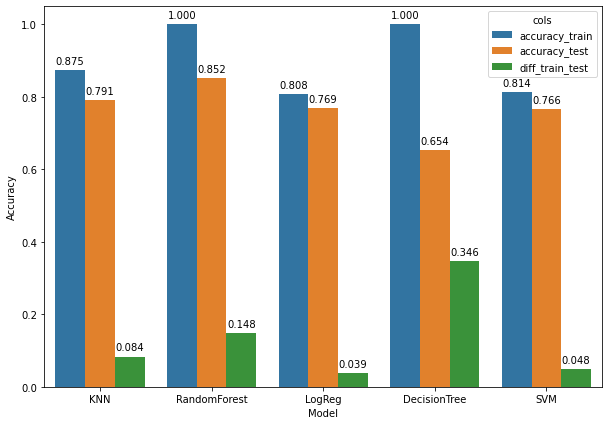

In [118]:
plt.figure(figsize=(10,7))
df_temp = accuracy_train_test.melt('model', var_name='cols',  value_name='vals')
ax = sns.barplot(x="model", y="vals", hue="cols", data=df_temp)
#for index, row in df_temp:
#    ax.text(row.name,row.vals, round(row.vals,2), color='black', ha="center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel('Accuracy')
plt.xlabel('Model')

fig_name = 'Accuracy_performance.png'
plt.savefig(fig_name, dpi=150, format='png')

In [119]:
df_temp

,model,cols,vals
0,KNN,accuracy_train,0.874911
1,RandomForest,accuracy_train,1.000000
2,LogReg,accuracy_train,0.808102
3,DecisionTree,accuracy_train,1.000000
4,SVM,accuracy_train,0.814144
5,KNN,accuracy_test,0.791342
6,RandomForest,accuracy_test,0.852140
7,LogReg,accuracy_test,0.769455
8,DecisionTree,accuracy_test,0.653696
9,SVM,accuracy_test,0.766051


* **KNN** --> Performance on test data is ca. 8% lower than on training data. Probably the model **overfits** on training data and does not generalize well on unseen test data.
* **Random Forest** --> Performance on test data is 15% lower than on training data. The model **overfits** on training data and does not generalize well on unseen test data.
* **Logistic Regression** --> training and test performance are very similar (diff=3.9%). This probably means that the created model **generalizes well** on new data.
* **Decision Tree** --> Performance on test data is 34% lower than on training data. The model **overfits** on training data and does not generalize well on unseen test data.
* **Support Vector Machine** --> training and test performance are very similar (diff=4.8%). This probably means that the created model **generalizes well** on new data.

-->Let´s check the confusion matrix of the two best models

## Confusion Matrix-Logistic Regression

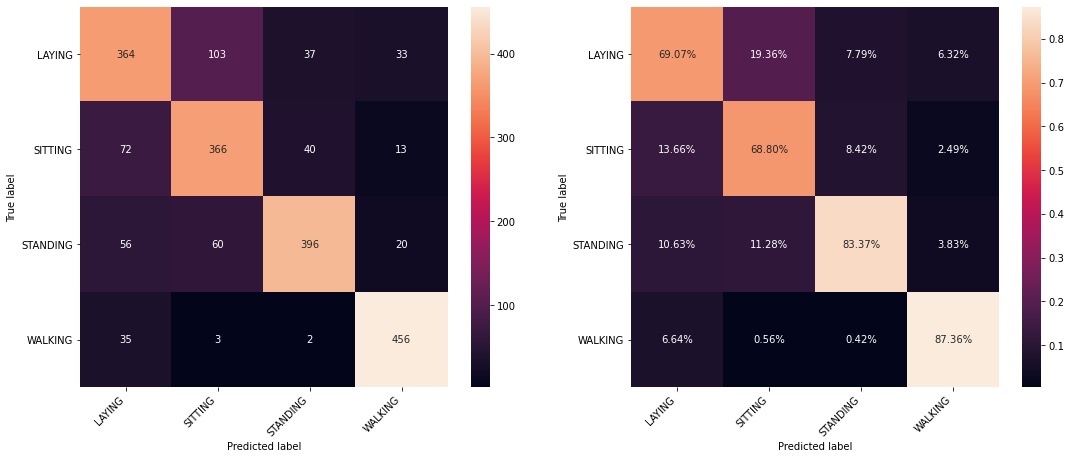

In [120]:
make_confusion_matrix(y_test,X_test, clf3)

## Confusion Matrix-SVM

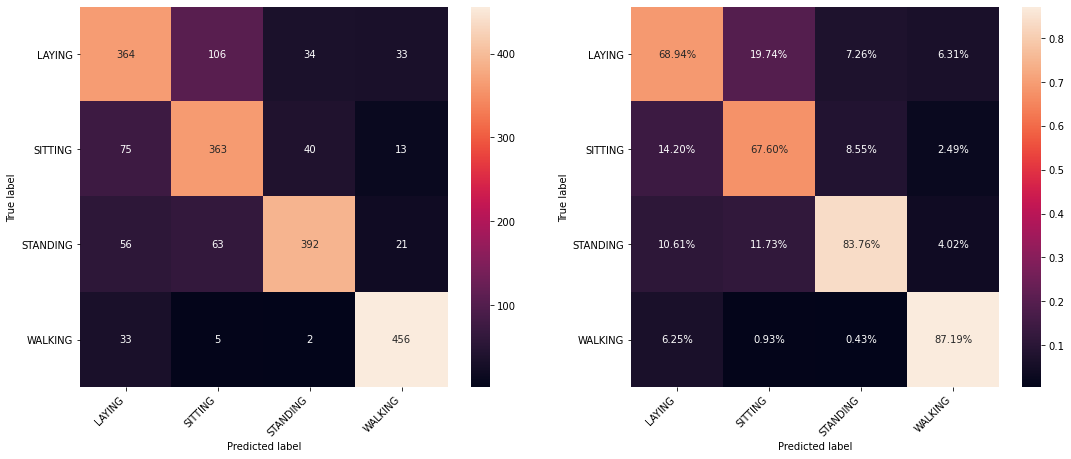

In [121]:
make_confusion_matrix(y_test,X_test, clf5)

In [122]:
final_results.loc[(slice(None), 'test', ('LogReg','SVM')), :].to_csv('LogReg_SVM_results.csv')
final_results.loc[(slice(None), 'test', ('LogReg','SVM')), :]

,,,LAYING,SITTING,STANDING,WALKING,accuracy,macro avg,weighted avg
,source,model_type,,,,,,,
precision,test,LogReg,0.690702,0.687970,0.833684,0.873563,0.769455,0.771480,0.771161
recall,test,LogReg,0.677840,0.745418,0.744361,0.919355,0.769455,0.771743,0.769455
f1-score,test,LogReg,0.684211,0.715543,0.786495,0.895874,0.769455,0.770530,0.769222
support,test,LogReg,537.000000,491.000000,532.000000,496.000000,0.769455,2056.000000,2056.000000
precision,test,SVM,0.689394,0.675978,0.837607,0.871893,0.766051,0.768718,0.768568
recall,test,SVM,0.677840,0.739308,0.736842,0.919355,0.766051,0.768336,0.766051
f1-score,test,SVM,0.683568,0.706226,0.784000,0.894995,0.766051,0.767197,0.765972
support,test,SVM,537.000000,491.000000,532.000000,496.000000,0.766051,2056.000000,2056.000000


## Feature Importance

* A One vs Rest Classifier exists of n individual classifiers (with n=number of classes). That makes it hard to interpret the feature importance for the whole OvsR-Classifier. One possible way is two determine the coefficients for each individual model and build the mean over each coefficient.

In [123]:
def get_the_feature_importances(clfobject,est_name, functype):
    feat_impts = []
    #estimator have feature_importances_ attribute
    if functype ==1:
        for esti in clfobject.best_estimator_.named_steps[est_name].estimators_:
            feat_impts.append(np.abs(esti.feature_importances_))
    #estimator have coef_ attribute
    if functype ==2:
        for esti in clfobject.best_estimator_.named_steps[est_name].estimators_:
            feat_impts.append(np.abs(esti.coef_[0]))
        
    return np.mean(feat_impts, axis=0)

In [124]:
feature_importance = pd.DataFrame({},[])
feature_importance['Features'] = X_test.columns
feature_importance['Importance'] = get_the_feature_importances(clf3,'logreg',2)

## Results

* The best model is the Logistic Regression OvsR Classifier. 
* It has a good accuracy (0.77:test, 0.81:train) and a good precision (0.87:test) for the class 'WALKING'.
* The 10 most important feautures of this OvsR-Classifier are the following:

In [125]:
feature_importance.sort_values('Importance',ascending=0).head(10).to_csv('FeatureImportanceTop10.csv')
feature_importance.sort_values('Importance',ascending=0).to_csv('FeatureImportanceAll.csv')
feature_importance.sort_values('Importance',ascending=0).head(10)

,Features,Importance
15,tBodyGyro-entropy()-X,1.170518
16,tBodyGyro-entropy()-Y,1.070693
3,"tBodyAcc-correlation()-Y,Z",0.791616
17,tBodyGyro-entropy()-Z,0.790347
14,tBodyGyro-mean()-Y,0.643740
32,fBodyGyro-meanFreq()-X,0.537990
29,fBodyAccJerk-maxInds-X,0.510996
18,"tBodyGyro-correlation()-X,Y",0.501925
13,tBodyGyro-mean()-X,0.490046
19,"tBodyGyro-correlation()-X,Z",0.468363


-->The most of this important features comes from the **gyroscope sensor** in the smartphone

## Final model for deployment

In [126]:
final_model = clf3.best_estimator_

# 6. Deployment
Test the prediction locally:

In [127]:
# recap: print first rows of predictors (here: training data without predicted column "Survived")
X_test.head(4)

,tBodyAcc-mean()-Y,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,...,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInds-Y,fBodyAccJerk-maxInds-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
5293,-0.023285,0.076989,-0.490546,-0.709003,0.980580,-0.996352,-0.960117,0.072046,0.045754,-0.106043,...,-0.52,0.08,0.32,0.184035,-0.059323,0.438107,0.006462,0.162920,-0.825886,0.271151
5294,-0.013163,-0.104983,-0.429134,0.399177,0.945233,-0.911415,-0.738535,0.070181,-0.017876,-0.001721,...,-0.16,-0.32,-0.40,0.018109,-0.227266,-0.151698,-0.083495,0.017500,-0.434375,0.920593
5295,-0.026050,0.305653,-0.323848,0.279786,0.548432,-0.334864,0.590302,0.069368,-0.004908,-0.013673,...,-0.64,-0.40,-0.44,-0.479145,-0.210084,0.049310,-0.034956,0.202302,0.064103,0.145068
5296,-0.032614,-0.063792,-0.167111,0.544916,0.985534,0.653169,0.746518,0.074853,0.032274,0.012141,...,-0.44,-0.56,-0.48,-0.496954,-0.499906,-0.258896,-0.017067,0.154438,0.340134,0.296407


In [128]:
# recap: print first rows of training data
data_test['Activity'].head(4)

5293    STANDING
5294    STANDING
5295    STANDING
5296    STANDING
Name: Activity, dtype: object

In [129]:
final_model.predict(X_test.head(4))

array(['LAYING', 'STANDING', 'STANDING', 'STANDING'], dtype='<U8')

-->final_model works and can be deplyoed